# Redes Complexas:  Lista01

**Aluno:** Gustavo Siqueira Barbosa

**Nº USP:** 10728122

**Docente:** Francisco Aparecido Rodrigues, francisco@icmc.usp.br.

Universidade de São Paulo, São Carlos, Brasil.


In [1]:
# Importando bibliotecas utilizadas
import networkx as nx
import numpy as np
import math

### Questão 01
Para a rede do livro "Os miseráveis" (base lesmis), calcule o terceiro e quarto momento do grau.

#### Resposta
O momento de uma distribuição de grau pode ser obtido matematicamente:

$$ M = \frac{1}{N}\sum_{i=1}^N{k_i^m}$$

Sendo $k_i$ o grau do vértice $i$, $N$ o número de vértices na rede e $m$ o índice do momento a ser descoberto.

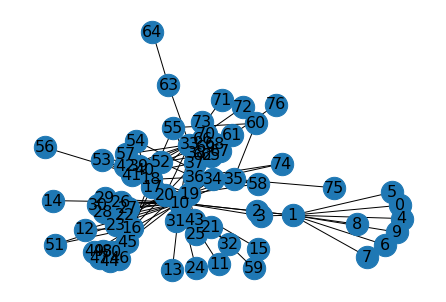

<Figure size 720x432 with 0 Axes>

NameError: name 'momment' is not defined

In [6]:
import matplotlib.pyplot as plt


# Lendo os dados
G= nx.read_edgelist("data/lesmis.txt", nodetype=int, data=(('weight',float),))
G = G.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G))
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])
G = nx.convert_node_labels_to_integers(G, first_label=0)

pos=nx.spring_layout(G)
nx.draw(G, with_labels = True, node_size=500, font_size=16, pos = pos)
plt.figure(figsize=(10,6))
plt.show(True)

# Função para o cálculo do momento
def moment(G,m):
    
    M = 0.0 # Momento se inicializa em 0
    for i in G.nodes:
        M += G.degree(i)**m
    
    return M/len(G)

print("3º momento:",momment(G,3))
print("4º momento:",momment(G,4))

### Questão 02
Implemente uma rotina para calcular a medida de complexidade. Qual o valor da complexidade para a rede de energia elétrica dos EUA (Base powergrid).

#### Resposta
O coeficiente de complexidade é calculado pela razão entre o segundo momento e o grau médio (primeiro momento)

$$\alpha = \frac{\langle k^2\rangle}{\langle k \rangle} $$

In [18]:
# Lendo os dados
G= nx.read_edgelist("data/powergrid.txt", nodetype=int, data=(('weight',float),))
G = G.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G))
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])
G = nx.convert_node_labels_to_integers(G, first_label=0)

def moment(G,m):
    
    M = 0.0 # Momento se inicializa em 0
    for i in G.nodes:
        M += G.degree(i)**m
    
    return M/len(G)

def complexity_coef(G):
    
    n = moment(G,2)
    d = moment(G,1)
    
    return n/d

print("Coeficiente de complexidade:",complexity_coef(G))

Coeficiente de complexidade: 3.8712465878070974


### Questão 03
Implemente uma rotina para calcular a entropia de Shannon e calcule essa medida para a base de estradas da Europa (base euroroad).

#### Resposta
A entropia de Shannon é calculada através da seguinte equação:
$$H = - \sum_{k=0}^\infty{P(k)log_2P(k)}$$

Sendo $P(k)$ a probabilidade associada ao grau $k$.

In [21]:
# Lendo os dados
G= nx.read_edgelist("data/euroroad.txt", nodetype=int, data=(('weight',float),))
G = G.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G))
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])
G = nx.convert_node_labels_to_integers(G, first_label=0)

def shannon_entropy(G):
    
    # Cria um array com os graus dos vértices
    deg_arr = np.array(list( (dict(G.degree())).values() ))
    
    # Array para armazenar a distribuição de graus.
    P = np.zeros(np.max(deg_arr)+1) 
    
    # Calcula a distribuição de graus somando a quantidade de vértices de cada grau e tirando a média
    for k in deg_arr:
        P[k] += 1
    P /= sum(P) 
    
    # Cálculo da entropia
    H = 0
    for pk in P:
        if pk > 0: H -= pk * math.log(pk,2)
    return H


print("Entropia de Shannon:",shannon_entropy(G))

Entropia de Shannon: 2.0036762578444716


### Questão 04
Calcule as medidas transitivity e average clustering coefficient para a base de dados de aeroportos do EUA (base usairport).

#### Resposta
* **Transitividade** é definida como:
$$ T = 3\cdot \frac{\text{nº de triângulos}}{\text{nº de tríades}}$$

* **Coeficiente de agrupamento médio** é definido como 

$$ C = \frac{1}{N} \sum_{k=1}^N{c_k} $$
Sendo $N$ o número de vértices da rede e $k \in G$ os vértices

In [8]:
# Lendo os dados
G= nx.read_edgelist("data/usairport.txt", nodetype=int, data=(('weight',float),))
G = G.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G))
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])
G = nx.convert_node_labels_to_integers(G, first_label=0)

# Calculando a transitividade através da função transitivity
print("Transitividade:",nx.transitivity(G))

# Calculando o coeficiente de agrupamento médio através da função average_clustering
print("Coeficiente de agrupamento médio:",nx.average_clustering(G))

Transitividade: 0.38414344664491556
Coeficiente de agrupamento médio: 0.5047939546538639


### Questão 05
Calcule o coeficiente de complexidade e a entropia de Shannon para a rede de aeroportos dos EUA (base usairport).

#### Resposta

In [19]:
# Lendo os dados
G= nx.read_edgelist("data/usairport.txt", nodetype=int, data=(('weight',float),))
G = G.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G))
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])
G = nx.convert_node_labels_to_integers(G, first_label=0)

def shannon_entropy(G):
    
    deg_arr = np.array(list( (dict(G.degree())).values() ))
    P = np.zeros(np.max(deg_arr)+1) 
    
    for k in deg_arr:
        P[k] += 1
    P /= sum(P) 
     
    H = 0
    for pk in P:
        if pk > 0: H -= pk * math.log(pk,2)
    return H

def moment(G,m):
    
    M = 0.0 # Momento se inicializa em 0
    for i in G.nodes:
        M += G.degree(i)**m
    
    return M/len(G)

def complexity_coef(G):
    
    n = moment(G,2)
    d = moment(G,1)
    
    return n/d

print("Coeficiente de complexidade:",complexity_coef(G))
print("Entropia de Shannon:",shannon_entropy(G))

Coeficiente de complexidade: 112.22870919019402
Entropia de Shannon: 4.989437976520321
